# **MI PRIMER E.D.A: EL SUICIDIO EN ESPAÑA**

>Natalia Fernández García

>Bootcamp: Data Science en The Bridge

>17/01/2022

### **LIBRERÍAS:**

In [42]:
import pandas as pd
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from utils import funciones

---------------------

### **HIPÓTESIS:**

A mayor inestabilidad laboral y menor PIB per capita, el número de suicidios aumenta.

-------------------------------------------

### **ARCHIVOS NECESARIOS:**

Enlaces:
- [Suicidios por distintos grupos de edad, sexo y comunidad autonoma 2000-2020](https://www.ine.es/jaxiT3/Tabla.htm?t=10803)

- [PIB y PIB per capita 2000-2020](https://www.ine.es/dyngs/INEbase/es/operacion.htm?c=Estadistica_C&cid=1254736167628&menu=resultados&idp=1254735576581)

- [Tasas de paro por distintos grupos de edad, sexo y comunidad autonoma 2000-2001](https://www.ine.es/jaxi/Tabla.htm?path=/t22/e308/meto_05/meto_05_bis/pae/px/l0/&file=03004.px&L=0)

- [Tasas de paro por distintos grupos de edad, sexo y comunidad autonoma 2002-2020](https://www.ine.es/jaxiT3/Tabla.htm?t=4247)

Archivos descargados e importados:

In [43]:
CA_PERIODO_SUICIDIOS = pd.read_excel(r'./data/tasas.xlsx', sheet_name = 'CA_PERIODO_SUICIDIOS')
CA_PERIODO_SUICIDIOSHOMBRES = pd.read_excel(r'./data/tasas.xlsx', sheet_name = 'CA_PERIODO_SUICIDIOSHOMBRES')
CA_PERIODO_SUICIDIOSMUJERES = pd.read_excel(r'./data/tasas.xlsx', sheet_name = 'CA_PERIODO_SUICIDIOSMUJERES')

CA_PERIODO_DESEMPLEO = pd.read_excel(r'./data/tasas.xlsx', sheet_name = 'CA_PERIODO_DESEMPLEO')
CA_PERIODO_DESEMPLEOHOMBRES = pd.read_excel(r'./data/tasas.xlsx', sheet_name = 'CA_PERIODO_DESEMPLEOHOMBRES')
CA_PERIODO_DESEMPLEOMUJERES = pd.read_excel(r'./data/tasas.xlsx', sheet_name = 'CA_PERIODO_DESEMPLEOMUJERES')

CA_PERIODO_PIB = pd.read_excel(r'./data/tasas.xlsx', sheet_name = 'CA_PERIODO_PIB')

EDAD_PERIODO_SUICIDIOS = pd.read_excel(r'./data/tasas.xlsx', sheet_name = 'EDAD_PERIODO_SUICIDIOS')
EDAD_PERIODO_SUICIDIOSHOMBRES = pd.read_excel(r'./data/tasas.xlsx', sheet_name = 'EDAD_PERIODO_SUICIDIOSHOMBRES')
EDAD_PERIODO_SUICIDIOSMUJERES = pd.read_excel(r'./data/tasas.xlsx', sheet_name = 'EDAD_PERIODO_SUICIDIOSMUJERES')

EDAD_PERIODO_DESEMPLEO = pd.read_excel(r'./data/tasas.xlsx', sheet_name = 'EDAD_PERIODO_DESEMPLEO')
EDAD_PERIODO_DESEMPLEOHOMBRES = pd.read_excel(r'./data/tasas.xlsx', sheet_name = 'EDAD_PERIODO_DESEMPLEOHOMBRES')
EDAD_PERIODO_DESEMPLEOMUJERES = pd.read_excel(r'./data/tasas.xlsx', sheet_name = 'EDAD_PERIODO_DESEMPLEOMUJERES')

PERIODO_SUICIDIOS = pd.read_excel(r'./data/tasas.xlsx', sheet_name = 'PERIODO_SUICIDIOS')
PERIODO_SUICIDIOSHOMBRES = pd.read_excel(r'./data/tasas.xlsx', sheet_name = 'PERIODO_SUICIDIOSHOMBRES')
PERIODO_SUICIDIOSMUJERES = pd.read_excel(r'./data/tasas.xlsx', sheet_name = 'PERIODO_SUICIDIOSMUJERES')

PERIODO_DESEMPLEO = pd.read_excel(r'./data/tasas.xlsx', sheet_name = 'PERIODO_DESEMPLEO')
PERIODO_DESEMPLEOHOMBRES = pd.read_excel(r'./data/tasas.xlsx', sheet_name = 'PERIODO_DESEMPLEOHOMBRES')
PERIODO_DESEMPLEOMUJERES = pd.read_excel(r'./data/tasas.xlsx', sheet_name = 'PERIODO_DESEMPLEOMUJERES')

PERIODO_PIB = pd.read_excel(r'./data/tasas.xlsx', sheet_name = 'PERIODO_PIB')

In [44]:
PERIODO_DESEMPLEOHOMBRES

,TRIMESTRE,DESEMPLEO HOMBRES
0,2020T4,14.17
1,2020T3,14.39
2,2020T2,14.13
3,2020T1,12.79
4,2019T4,12.23
...,...,...
79,2001T1,7.92
80,2000T4,9.29
81,2000T3,9.16
82,2000T2,9.45


--------

### **COMPROBACIÓN DE DATAFRAMES:**

In [45]:
# Quitar # para ir comprobando:

# CA_PERIODO_SUICIDIOS.info()
# CA_PERIODO_SUICIDIOSHOMBRES.info()
# CA_PERIODO_SUICIDIOSMUJERES.info()

# CA_PERIODO_DESEMPLEO.info()
# CA_PERIODO_DESEMPLEOHOMBRES.info()
# CA_PERIODO_DESEMPLEOMUJERES.info()

# CA_PERIODO_PIB.info()

# EDAD_PERIODO_SUICIDIOS.info()
# EDAD_PERIODO_SUICIDIOSHOMBRES.info()
# EDAD_PERIODO_SUICIDIOSMUJERES.info()

# EDAD_PERIODO_DESEMPLEO.info()
# EDAD_PERIODO_DESEMPLEOHOMBRES.info()
# EDAD_PERIODO_DESEMPLEOMUJERES.info()

# PERIODO_SUICIDIOS.info()
# PERIODO_SUICIDIOSHOMBRES.info()
# PERIODO_SUICIDIOSMUJERES.info()

# PERIODO_DESEMPLEO.info()
# PERIODO_DESEMPLEOHOMBRES.info()
# PERIODO_DESEMPLEOMUJERES.info()

PERIODO_PIB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   PERIODO  21 non-null     int64
 1   PIB      21 non-null     int64
dtypes: int64(2)
memory usage: 464.0 bytes


-----

### **LIMPIEZA DE DATOS:**

Procedemos a la limpieza de datos con:

**Libreria PANDAS:** Previamente instalada e importada al principio de este notebook.
    
**Funciones personalizadas** para optimizar el proceso:
    Instaladas en la ubicación \src\utils

#### **Aplicando funciones persobalizadas**

 **1.Función:**
 > calcular_columna_anual(nombre_archivo)

El dataframe tiene una columna con los trimestres del año. Para el análisis se necesita que esta información esté anual. Se procede a calcular la media anual de desempleo en la columna donde aparecen las fechas en trimestres.
Usamos la función:


In [46]:
# Aquí podemos ver la columna 'TRIMESTRE':
CA_PERIODO_DESEMPLEO.head(3)

,CA,TRIMESTRE,DESEMPLEO
0,01 Andalucía,2020T4,22.74
1,01 Andalucía,2020T3,23.80
2,01 Andalucía,2020T2,21.32


In [47]:
# CA_PERIODO_DESEMPLEO

In [48]:
CA_PERIODO_DESEMPLEO = funciones.calcular_columna_anual(CA_PERIODO_DESEMPLEO)
CA_PERIODO_DESEMPLEO.head()

,CA,PERIODO,DESEMPLEO
0,01 Andalucía,2000,51.47
1,01 Andalucía,2001,50.08
2,01 Andalucía,2002,19.50
3,01 Andalucía,2003,18.45
4,01 Andalucía,2004,16.99


In [49]:
CA_PERIODO_DESEMPLEOHOMBRES = funciones.calcular_columna_anual(CA_PERIODO_DESEMPLEOHOMBRES)
CA_PERIODO_DESEMPLEOHOMBRES.head()

,CA,PERIODO,DESEMPLEO HOMBRES
0,01 Andalucía,2000,17.79
1,01 Andalucía,2001,13.89
2,01 Andalucía,2002,14.28
3,01 Andalucía,2003,13.70
4,01 Andalucía,2004,12.60


In [50]:
CA_PERIODO_DESEMPLEOMUJERES = funciones.calcular_columna_anual(CA_PERIODO_DESEMPLEOMUJERES)
CA_PERIODO_DESEMPLEOMUJERES.head()

,CA,PERIODO,DESEMPLEO MUJERES
0,01 Andalucía,2000,34.44
1,01 Andalucía,2001,26.78
2,01 Andalucía,2002,27.89
3,01 Andalucía,2003,25.95
4,01 Andalucía,2004,23.84


In [51]:
# EDAD_PERIODO_DESEMPLEO

In [52]:
EDAD_PERIODO_DESEMPLEO = funciones.calcular_columna_anual(EDAD_PERIODO_DESEMPLEO)
EDAD_PERIODO_DESEMPLEO.head()

,EDAD,PERIODO,DESEMPLEO
0,De 16 a 19 años,2000,34.40
1,De 16 a 19 años,2001,29.16
2,De 16 a 19 años,2002,29.88
3,De 16 a 19 años,2003,32.88
4,De 16 a 19 años,2004,30.73


In [53]:
EDAD_PERIODO_DESEMPLEOHOMBRES = funciones.calcular_columna_anual(EDAD_PERIODO_DESEMPLEOHOMBRES)
EDAD_PERIODO_DESEMPLEOHOMBRES.head()

,EDAD,PERIODO,DESEMPLEO HOMBRES
0,De 16 a 19 años,2000,28.24
1,De 16 a 19 años,2001,34.28
2,De 16 a 19 años,2002,25.37
3,De 16 a 19 años,2003,28.05
4,De 16 a 19 años,2004,26.57


In [54]:
EDAD_PERIODO_DESEMPLEOMUJERES = funciones.calcular_columna_anual(EDAD_PERIODO_DESEMPLEOMUJERES)
EDAD_PERIODO_DESEMPLEOMUJERES.head()

,EDAD,PERIODO,DESEMPLEO MUJERES
0,De 16 a 19 años,2000,31.66
1,De 16 a 19 años,2001,36.25
2,De 16 a 19 años,2002,37.55
3,De 16 a 19 años,2003,40.96
4,De 16 a 19 años,2004,37.70


In [55]:
# PERIODO_DESEMPLEO

In [56]:
PERIODO_DESEMPLEO = funciones.calcular_columna_anual(PERIODO_DESEMPLEO)
PERIODO_DESEMPLEO.head()

,PERIODO,DESEMPLEO
0,2000,13.87
1,2001,10.55
2,2002,11.45
3,2003,11.48
4,2004,10.96


In [57]:
PERIODO_DESEMPLEOHOMBRES = funciones.calcular_columna_anual(PERIODO_DESEMPLEOHOMBRES)
PERIODO_DESEMPLEOHOMBRES.head()

,PERIODO,DESEMPLEO HOMBRES
0,2000,9.56
1,2001,7.54
2,2002,8.30
3,2003,8.50
4,2004,8.26


In [58]:
PERIODO_DESEMPLEOMUJERES = funciones.calcular_columna_anual(PERIODO_DESEMPLEOMUJERES)
PERIODO_DESEMPLEOMUJERES.head()

,PERIODO,DESEMPLEO MUJERES
0,2000,20.43
1,2001,15.22
2,2002,16.15
3,2003,15.84
4,2004,14.82


  **2.Función:**
  > quitar_ca(nombre_archivo)

Las columnas de 'CA' aparecen enumeradas. Como esta:

        | 01 Andalucía |

 Se genera una nueva columna de 'CCAA' con las Comunidades Autónomas sin numerar y se elimina la antigua. Quedando así:
 
        | Andalucía |

In [59]:
# CA_PERIODO_SUICIDIOS

In [60]:
CA_PERIODO_SUICIDIOS = funciones.quitar_ca(CA_PERIODO_SUICIDIOS)
CA_PERIODO_SUICIDIOS.head()

,PERIODO,SUICIDIOS,CCAA
0,2020,793,Andalucía
1,2019,640,Andalucía
2,2018,653,Andalucía
3,2017,692,Andalucía
4,2016,668,Andalucía


In [61]:
CA_PERIODO_SUICIDIOSHOMBRES = funciones.quitar_ca(CA_PERIODO_SUICIDIOSHOMBRES)
CA_PERIODO_SUICIDIOSHOMBRES.head()

,PERIODO,SUICIDIOS HOMBRES,CCAA
0,2020,576,Andalucía
1,2019,478,Andalucía
2,2018,505,Andalucía
3,2017,506,Andalucía
4,2016,528,Andalucía


In [62]:
CA_PERIODO_SUICIDIOSMUJERES = funciones.quitar_ca(CA_PERIODO_SUICIDIOSMUJERES)
CA_PERIODO_SUICIDIOSMUJERES.head()

,PERIODO,SUICIDIOS MUJERES,CCAA
0,2020,217,Andalucía
1,2019,162,Andalucía
2,2018,148,Andalucía
3,2017,186,Andalucía
4,2016,140,Andalucía


In [63]:
# CA_PERIODO_DESEMPLEO

In [64]:
CA_PERIODO_DESEMPLEO = funciones.quitar_ca(CA_PERIODO_DESEMPLEO)
CA_PERIODO_DESEMPLEO.head()

,PERIODO,DESEMPLEO,CCAA
0,2000,51.47,Andalucía
1,2001,50.08,Andalucía
2,2002,19.50,Andalucía
3,2003,18.45,Andalucía
4,2004,16.99,Andalucía


In [65]:
CA_PERIODO_DESEMPLEOHOMBRES = funciones.quitar_ca(CA_PERIODO_DESEMPLEOHOMBRES)
CA_PERIODO_DESEMPLEOHOMBRES

,PERIODO,DESEMPLEO HOMBRES,CCAA
0,2000,17.79,Andalucía
1,2001,13.89,Andalucía
2,2002,14.28,Andalucía
3,2003,13.70,Andalucía
4,2004,12.60,Andalucía
...,...,...,...
499,2000,6.62,Castilla - La Mancha
500,2000,7.73,Castilla y León
501,2000,7.25,Castilla - La Mancha
502,2000,8.85,Castilla y León


In [66]:
CA_PERIODO_DESEMPLEOMUJERES = funciones.quitar_ca(CA_PERIODO_DESEMPLEOMUJERES)
CA_PERIODO_DESEMPLEOMUJERES.head()

,PERIODO,DESEMPLEO MUJERES,CCAA
0,2000,34.44,Andalucía
1,2001,26.78,Andalucía
2,2002,27.89,Andalucía
3,2003,25.95,Andalucía
4,2004,23.84,Andalucía


In [67]:
# CA_PERIODO_PIB

In [68]:
CA_PERIODO_PIB = funciones.quitar_ca(CA_PERIODO_PIB)
CA_PERIODO_PIB.head()

,PERIODO,PIB,CCAA
0,2020,17747,Andalucía
1,2019,19530,Andalucía
2,2018,19103,Andalucía
3,2017,18490,Andalucía
4,2016,17659,Andalucía


---------

### **UNIENDO DATAFRAMES:**
    

Unimos los dataframes para posteriormentne obtener los archivos:
- CA_PERIODO_SUICIDIOSCCAA_DESEMPLEO_PIB.csv
- PERIODO_SUICIDIOSNACIONALES_DESEMPLEO_PIB.csv

In [78]:
# DATAFRAME DE COMUNIDADES: SUICIDIOS, DESEMPLEO Y PIB
df = pd.concat([CA_PERIODO_SUICIDIOS, CA_PERIODO_SUICIDIOSHOMBRES, CA_PERIODO_SUICIDIOSMUJERES, CA_PERIODO_DESEMPLEO,CA_PERIODO_DESEMPLEOHOMBRES, CA_PERIODO_DESEMPLEOMUJERES,  CA_PERIODO_PIB], axis=1)
df = df.loc[:,~df.columns.duplicated()] # Eliminamos las columnas duplicadas y nos quedamos con una.
CA_PERIODO_SUICIDIOS_DESEMPLEO_PIB = df
CA_PERIODO_SUICIDIOS_DESEMPLEO_PIB.head()

,PERIODO,SUICIDIOS,CCAA,SUICIDIOS HOMBRES,SUICIDIOS MUJERES,DESEMPLEO,DESEMPLEO HOMBRES,DESEMPLEO MUJERES,PIB
0,2020.0,793.0,Andalucía,576.0,217.0,51.47,17.79,34.44,17747.0
1,2019.0,640.0,Andalucía,478.0,162.0,50.08,13.89,26.78,19530.0
2,2018.0,653.0,Andalucía,505.0,148.0,19.50,14.28,27.89,19103.0
3,2017.0,692.0,Andalucía,506.0,186.0,18.45,13.70,25.95,18490.0
4,2016.0,668.0,Andalucía,528.0,140.0,16.99,12.60,23.84,17659.0


In [71]:
# DATAFRAME DE COMUNIDADES: SUICIDIOS, DESEMPLEO, PIB Y SEXO
df = pd.concat([CA_PERIODO_DESEMPLEO, CA_PERIODO_DESEMPLEOHOMBRES, CA_PERIODO_DESEMPLEOMUJERES, CA_PERIODO_SUICIDIOS, CA_PERIODO_SUICIDIOSHOMBRES, CA_PERIODO_SUICIDIOSMUJERES, CA_PERIODO_PIB], axis=1)
df = df.loc[:,~df.columns.duplicated()] # Eliminamos las columnas duplicadas y nos quedamos con una.
df = df[['PERIODO', 'CCAA', 'DESEMPLEO', 'DESEMPLEO HOMBRES', 'DESEMPLEO MUJERES', 'SUICIDIOS', 'SUICIDIOS HOMBRES', 'SUICIDIOS MUJERES', 'PIB']]  # Ordenamos las columnas.
CA_PERIODO_SUICIDIOSCCAA_DESEMPLEO_PIB = df
CA_PERIODO_SUICIDIOSCCAA_DESEMPLEO_PIB.head()

,PERIODO,CCAA,DESEMPLEO,DESEMPLEO HOMBRES,DESEMPLEO MUJERES,SUICIDIOS,SUICIDIOS HOMBRES,SUICIDIOS MUJERES,PIB
0,2000,Andalucía,51.47,17.79,34.44,793.0,576.0,217.0,17747.0
1,2001,Andalucía,50.08,13.89,26.78,640.0,478.0,162.0,19530.0
2,2002,Andalucía,19.50,14.28,27.89,653.0,505.0,148.0,19103.0
3,2003,Andalucía,18.45,13.70,25.95,692.0,506.0,186.0,18490.0
4,2004,Andalucía,16.99,12.60,23.84,668.0,528.0,140.0,17659.0


In [72]:
# DATAFRAME DE PERIODOS NACIONALES: SUICIDIOS NACIONALES, DESEMPLEO Y PIB
df = pd.concat([PERIODO_SUICIDIOS, PERIODO_SUICIDIOSHOMBRES, PERIODO_SUICIDIOSMUJERES, PERIODO_DESEMPLEO, PERIODO_DESEMPLEOHOMBRES, PERIODO_DESEMPLEOMUJERES, PERIODO_PIB], axis=1)
df = df.loc[:,~df.columns.duplicated()] # Eliminamos las columnas duplicadas y nos quedamos con una.
df = df[['PERIODO', 'DESEMPLEO', 'DESEMPLEO HOMBRES', 'DESEMPLEO MUJERES', 'SUICIDIOS', 'SUICIDIOS HOMBRES', 'SUICIDIOS MUJERES', 'PIB']]
df = df.sort_values('PERIODO',ascending=True)
PERIODO_SUICIDIOSNACIONALES_DESEMPLEO_PIB = df
PERIODO_SUICIDIOSNACIONALES_DESEMPLEO_PIB.head()

,PERIODO,DESEMPLEO,DESEMPLEO HOMBRES,DESEMPLEO MUJERES,SUICIDIOS,SUICIDIOS HOMBRES,SUICIDIOS MUJERES,PIB
20,2000,15.53,13.87,17.42,3393,2574,819,297738
19,2001,14.10,12.45,16.00,3189,2430,759,318108
18,2002,15.26,13.72,17.02,3371,2554,817,334567
17,2003,17.23,15.66,19.03,3478,2650,828,351521
16,2004,19.63,18.12,21.38,3507,2651,856,370145


----------------------------------

### **CREACIÓN DE GRÁFICAS:**

Pruebas para comprobar que se visualizan bien.

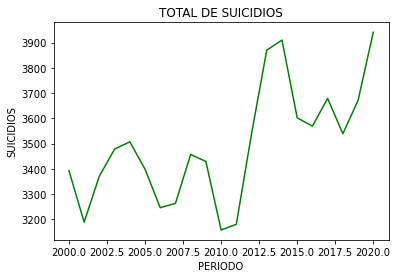

In [73]:
# TOTAL DE SUICIDIOS NACIONAL
sns.lineplot(data = PERIODO_SUICIDIOS, x = "PERIODO", y = "SUICIDIOS", color = "green")
plt.title("TOTAL DE SUICIDIOS")
plt.xlabel("PERIODO")
plt.ylabel("SUICIDIOS")
plt.show()

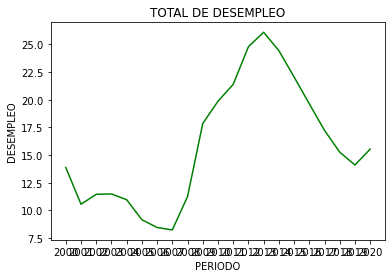

In [74]:
# TOTAL DE DESEMPLO NACIONAL
sns.lineplot(data = PERIODO_DESEMPLEO, x = "PERIODO", y = "DESEMPLEO", color = "green")
plt.title("TOTAL DE DESEMPLEO")
plt.xlabel("PERIODO")
plt.ylabel("DESEMPLEO")
plt.show()

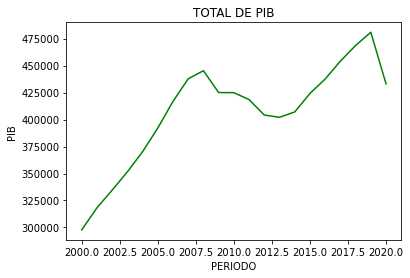

In [75]:
# TOTAL PIB NACIONAL
sns.lineplot(data = PERIODO_PIB, x = "PERIODO", y = "PIB", color = "green")
plt.title("TOTAL DE PIB")
plt.xlabel("PERIODO")
plt.ylabel("PIB")
plt.show()

--------

### **GUARDAR LOS DATAFRAME:**

Guardamos los dataframes en la carpeta /utils para poder trabar en POWER BI.

In [76]:
CA_PERIODO_SUICIDIOS.to_csv(r'./utils/CA_PERIODO_SUICIDIOS.csv', index=False)
CA_PERIODO_SUICIDIOSHOMBRES.to_csv(r'./utils/CA_PERIODO_SUICIDIOSHOMBRES.csv', index=False)
CA_PERIODO_SUICIDIOSMUJERES.to_csv(r'./utils/CA_PERIODO_SUICIDIOSMUJERES.csv', index=False)

CA_PERIODO_DESEMPLEO.to_csv(r'./utils/CA_PERIODO_DESEMPLEO.csv', index=False)
CA_PERIODO_DESEMPLEOHOMBRES.to_csv(r'./utils/CA_PERIODO_DESEMPLEOHOMBRES.csv', index=False)
CA_PERIODO_DESEMPLEOMUJERES.to_csv(r'./utils/CA_PERIODO_DESEMPLEOMUJERES.csv', index=False)

CA_PERIODO_PIB.to_csv(r'./utils/CA_PERIODO_PIB.csv', index=False)

EDAD_PERIODO_SUICIDIOS.to_csv(r'./utils/EDAD_PERIODO_SUICIDIOS.csv', index=False)
EDAD_PERIODO_SUICIDIOSHOMBRES.to_csv(r'./utils/EDAD_PERIODO_SUICIDIOSHOMBRES.csv', index=False)
EDAD_PERIODO_SUICIDIOSMUJERES.to_csv(r'./utils/EDAD_PERIODO_SUICIDIOSMUJERES.csv', index=False)

EDAD_PERIODO_DESEMPLEO.to_csv(r'./utils/EDAD_PERIODO_DESEMPLEO.csv', index=False)
EDAD_PERIODO_DESEMPLEOHOMBRES.to_csv(r'./utils/EDAD_PERIODO_DESEMPLEOHOMBRES.csv', index=False)
EDAD_PERIODO_DESEMPLEOMUJERES.to_csv(r'./utils/EDAD_PERIODO_DESEMPLEOMUJERES.csv', index=False)

PERIODO_SUICIDIOS.to_csv(r'./utils/PERIODO_SUICIDIOS.csv', index=False)
PERIODO_SUICIDIOSHOMBRES.to_csv(r'./utils/PERIODO_SUICIDIOSHOMBRES.csv', index=False)
PERIODO_SUICIDIOSMUJERES.to_csv(r'./utils/PERIODO_SUICIDIOSMUJERES.csv', index=False)

PERIODO_DESEMPLEO.to_csv(r'./utils/PERIODO_DESEMPLEO.csv', index=False)
PERIODO_DESEMPLEOHOMBRES.to_csv(r'./utils/PERIODO_DESEMPLEOHOMBRES.csv', index=False)
PERIODO_DESEMPLEOMUJERES.to_csv(r'./utils/PERIODO_DESEMPLEOMUJERES.csv', index=False)

PERIODO_PIB.to_csv(r'./utils/PERIODO_PIB.csv', index=False)

CA_PERIODO_SUICIDIOSCCAA_DESEMPLEO_PIB.to_csv(r'./utils/CA_PERIODO_SUICIDIOSCCAA_DESEMPLEO_PIB.csv', index=False)
PERIODO_SUICIDIOSNACIONALES_DESEMPLEO_PIB.to_csv(r'./utils/PERIODO_SUICIDIOSNACIONALES_DESEMPLEO_PIB.csv', index=False)

---------------

### **GRACIAS:**
>Natalia Fernández García

>Bootcamp: Data Science en The Bridge

>17/01/2022